# Problem 2: AR(p) Companion State Space Form

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YOUR_USERNAME/YOUR_REPO/blob/main/Quantlet_Problem02_AR_CompanionForm.ipynb)

---

**QuantLet Name:** `SSM_AR_CompanionForm`  
**Published in:** State Space Models and Markov Switching Models — Chapter 8  
**Author:** Daniel Traian Pele  
**Institution:** Bucharest University of Economic Studies  
**Date:** February 2026  

---

## Problem
Find a state space form for the causal AR($p$) model:
$$Y_t = \varphi_1 Y_{t-1} + \cdots + \varphi_p Y_{t-p} + \varepsilon_t$$

using the companion matrix formulation.

---
## Plotting: ✅ Transparent background · ✅ No grid · ✅ Legend outside bottom


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

plt.rcParams.update({
    'figure.facecolor': 'none', 'axes.facecolor': 'none',
    'savefig.facecolor': 'none', 'axes.grid': False,
    'font.size': 11, 'axes.labelsize': 12,
    'axes.titlesize': 13, 'figure.figsize': (12, 5)
})
print('Setup complete.')


Setup complete.


## 1. Companion Matrix Formulation

Define the state vector $\mathbf{X}_t = (Y_{t-p+1}, \ldots, Y_t)'$ and noise $\boldsymbol{\eta}_{t+1} = (0, \ldots, 0, \varepsilon_{t+1})'$.

Then:
$$\mathbf{X}_{t+1} = \mathbf{F}\mathbf{X}_t + \boldsymbol{\eta}_{t+1}, \quad Y_t = (0, \ldots, 0, 1)\mathbf{X}_t$$

where $\mathbf{F}$ is the companion matrix with $\varphi_p, \ldots, \varphi_1$ in the last row.


## 2. Numerical Example: AR(3)


In [2]:
# AR(3) example: Y_t = 0.5*Y_{t-1} + 0.3*Y_{t-2} - 0.1*Y_{t-3} + eps_t
np.random.seed(123)
n = 500
phi = np.array([0.5, 0.3, -0.1])
p = len(phi)

# Companion matrix F
F = np.zeros((p, p))
F[:p-1, 1:] = np.eye(p - 1)  # shift matrix
F[-1, :] = phi[::-1]  # last row: phi_p, ..., phi_1

print('Companion Matrix F:')
print(F)

# Eigenvalues for stability check
eigvals = np.linalg.eigvals(F)
print(f'\nEigenvalues: {eigvals}')
print(f'Max |eigenvalue|: {np.max(np.abs(eigvals)):.4f}')
print(f'Causal (all |λ| < 1)? {"YES ✅" if np.all(np.abs(eigvals) < 1) else "NO ❌"}')


Companion Matrix F:
[[ 0.   1.   0. ]
 [ 0.   0.   1. ]
 [-0.1  0.3  0.5]]

Eigenvalues: [ 0.7236068  0.2763932 -0.5      ]
Max |eigenvalue|: 0.7236
Causal (all |λ| < 1)? YES ✅


In [3]:
# Simulate AR(3) — direct method
eps = np.random.normal(0, 1, n)
Y_direct = np.zeros(n)
for t in range(p, n):
    Y_direct[t] = phi[0]*Y_direct[t-1] + phi[1]*Y_direct[t-2] + phi[2]*Y_direct[t-3] + eps[t]

# Simulate AR(3) — state space method
X = np.zeros((p, n))
Y_ss = np.zeros(n)
H = np.array([0, 0, 1])  # observation vector
for t in range(p, n):
    eta = np.array([0, 0, eps[t]])
    X[:, t] = F @ X[:, t-1] + eta
    Y_ss[t] = H @ X[:, t]

max_diff = np.max(np.abs(Y_direct[p:] - Y_ss[p:]))
print(f'Maximum absolute difference: {max_diff:.2e}')
print(f'Equivalent? {"YES ✅" if max_diff < 1e-10 else "NO ❌"}')


Maximum absolute difference: 8.88e-16
Equivalent? YES ✅


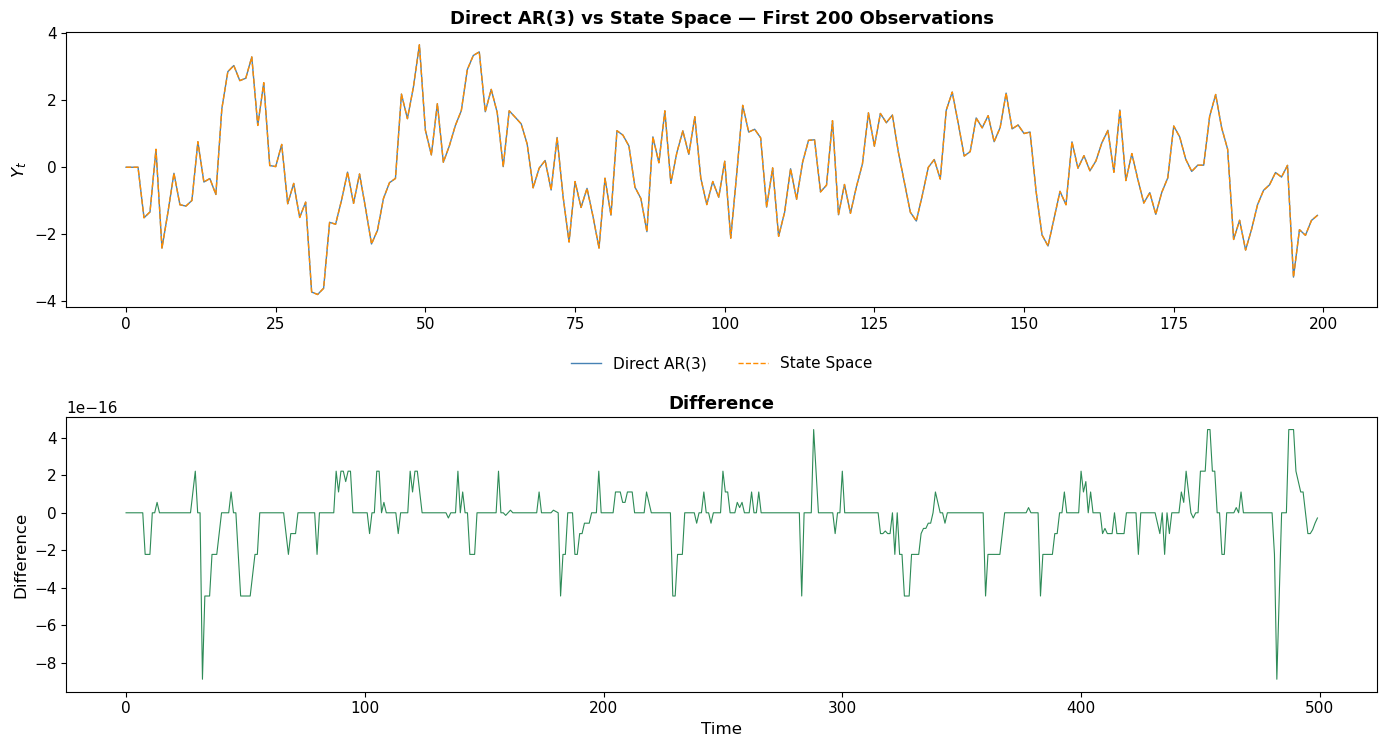

In [4]:
# Plot comparison
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.patch.set_alpha(0)

ax = axes[0]
ax.patch.set_alpha(0); ax.grid(False)
ax.plot(Y_direct[:200], color='steelblue', linewidth=1.0, label='Direct AR(3)')
ax.plot(Y_ss[:200], color='darkorange', linewidth=1.0, linestyle='--', label='State Space')
ax.set_title('Direct AR(3) vs State Space — First 200 Observations',
             fontsize=13, fontweight='bold')
ax.set_ylabel('$Y_t$')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=2, frameon=False)

ax = axes[1]
ax.patch.set_alpha(0); ax.grid(False)
ax.plot(Y_direct - Y_ss, color='seagreen', linewidth=0.8)
ax.set_title('Difference', fontsize=13, fontweight='bold')
ax.set_xlabel('Time'); ax.set_ylabel('Difference')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('AR_CompanionForm_Comparison.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()


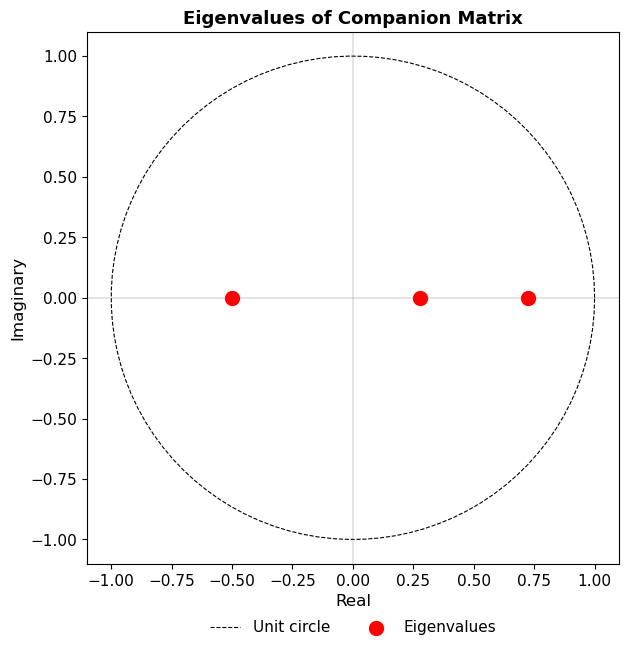

In [5]:
# Visualize eigenvalues on unit circle
fig, ax = plt.subplots(figsize=(7, 7))
fig.patch.set_alpha(0); ax.patch.set_alpha(0); ax.grid(False)

theta_circ = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta_circ), np.sin(theta_circ), 'k--', linewidth=0.8, label='Unit circle')
ax.scatter(eigvals.real, eigvals.imag, s=100, color='red', zorder=5, label='Eigenvalues')
ax.axhline(0, color='grey', linewidth=0.3)
ax.axvline(0, color='grey', linewidth=0.3)
ax.set_xlabel('Real'); ax.set_ylabel('Imaginary')
ax.set_title('Eigenvalues of Companion Matrix', fontsize=13, fontweight='bold')
ax.set_aspect('equal')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2, frameon=False)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('AR_Eigenvalues_UnitCircle.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()


## Conclusion

The companion matrix state space form perfectly reproduces the AR($p$) process. All eigenvalues lie inside the unit circle, confirming causality.
